In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import json
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import json

# LassoLogRegXGB

In [5]:
with open ('./Set_StopLoss/my__FINAL_portfolio_return_LassoLogRegXGB.json', 'r') as f:
    my_portfoli = json.load(f)

In [6]:
my_portfoli

{'2015-08-01': [['شبریز.xlsx', -0.1],
  ['کچاد.xlsx', -0.06014760147601476],
  ['شاوان.xlsx', -0.1],
  ['خراسان.xlsx', 0.003048780487804878]],
 '2015-09-01': [['فباهنر.xlsx', -0.01124567474048443],
  ['زاگرس.xlsx', 0.09867172675521822],
  ['شیران.xlsx', 0.021820448877805487],
  ['شبهرن.xlsx', -0.02049272116461366]],
 '2015-10-01': [['کگل.xlsx', -0.08649468892261002],
  ['شیراز.xlsx', 0.04375569735642662],
  ['خراسان.xlsx', 0.08792098445595854],
  ['کچاد.xlsx', -0.05047189167008617]],
 '2015-11-01': [['شفن.xlsx', -0.001073345259391771],
  ['مارون.xlsx', -0.003502203973190025],
  ['شپدیس.xlsx', -0.01655795283492223],
  ['شیراز.xlsx', -0.009318578916715201]],
 '2015-12-01': [['شیران.xlsx', 0.2950191570881226],
  ['شپدیس.xlsx', -0.05102040816326531],
  ['شبهرن.xlsx', 0.06527848748083802],
  ['مارون.xlsx', 0.08277282918257287]],
 '2016-01-01': [['شکبیر.xlsx', 0.006464883925947693],
  ['فخاس.xlsx', -0.014087870105062083],
  ['ارفع.xlsx', 0.021109770808202654],
  ['مارون.xlsx', -0.02709768784

In [7]:
with open('/home/amin/thesis/src/Step4_Portfolio_Optimization/StockWeight_SharpRatio/OptimizedPortfolio_weight_LassoLogRegXgb.json', 'r') as k:
    optimal_weight = json.load(k)

In [8]:
optimal_weight

{'2015-08-01': [[['شبریز.xlsx', '0.400'],
   ['کچاد.xlsx', '0.000'],
   ['شاوان.xlsx', '0.400'],
   ['خراسان.xlsx', '0.200']]],
 '2015-09-01': [[['فباهنر.xlsx', '0.200'],
   ['زاگرس.xlsx', '0.400'],
   ['شیران.xlsx', '0.000'],
   ['شبهرن.xlsx', '0.400']]],
 '2015-10-01': [[['کگل.xlsx', '0.400'],
   ['شیراز.xlsx', '0.200'],
   ['خراسان.xlsx', '0.400'],
   ['کچاد.xlsx', '0.000']]],
 '2015-11-01': [[['شفن.xlsx', '0.000'],
   ['مارون.xlsx', '0.200'],
   ['شپدیس.xlsx', '0.400'],
   ['شیراز.xlsx', '0.400']]],
 '2015-12-01': [[['شیران.xlsx', '0.400'],
   ['شپدیس.xlsx', '0.200'],
   ['شبهرن.xlsx', '0.400'],
   ['مارون.xlsx', '0.000']]],
 '2016-01-01': [[['شکبیر.xlsx', '0.383'],
   ['فخاس.xlsx', '0.021'],
   ['ارفع.xlsx', '0.175'],
   ['مارون.xlsx', '0.421']]],
 '2016-02-01': [[['کگل.xlsx', '0.152'],
   ['جم.xlsx', '0.443'],
   ['شبهرن.xlsx', '0.378'],
   ['شکبیر.xlsx', '0.027']]],
 '2016-03-01': [[['فولاد.xlsx', '0.000'],
   ['کنور.xlsx', '0.200'],
   ['خساپا.xlsx', '0.400'],
   ['شیراز.xlsx',

In [9]:
date_range = pd.date_range(start='2015-08-01', end='2023-08-31', freq='MS')

In [10]:
df = pd.DataFrame(date_range, columns=['Date'])
df.set_index('Date', inplace=True)
df.head()

""
Date
2015-08-01
2015-09-01
2015-10-01
2015-11-01
2015-12-01


In [21]:
for date , value in my_portfoli.items():
    print(date)
    print(value)
    print('*******')
    for date2 , value2 in optimal_weight.items():
        if date == date2 :
            stock_weights = []
            for item in value2 :
                for i in item :
                    stock_weights.append(float(i[1]))
            break
    break
print(stock_weights)

2015-08-01
[['شبریز.xlsx', -0.1], ['کچاد.xlsx', -0.06014760147601476], ['شاوان.xlsx', -0.1], ['خراسان.xlsx', 0.003048780487804878]]
*******
[0.4, 0.0, 0.4, 0.2]


In [24]:
for date , value in my_portfoli.items():
    for date2 , value2 in optimal_weight.items():
        if date == date2 :
            stock_weights = []
            for item in value2 :
                for i in item :
                    stock_weights.append(float(i[1]))

    stock_weights = stock_weights
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'LassoLogRegXGB-OptimalWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.07939024390243904
**************************************************
2015-09-01
0.02902246728814494
**************************************************
2015-10-01
0.00932165768462474
**************************************************
2015-11-01
-0.011051053495292978
**************************************************
2015-12-01
0.1339149761949312
**************************************************
2016-01-01
-0.005533711420100819
**************************************************
2016-02-01
0.05010177181496498
**************************************************
2016-03-01
-0.007744319277489944
**************************************************
2016-04-01
0.10193016453382085
**************************************************
2016-05-01
-0.046785750187941164
**************************************************
2016-06-01
0.007664354175814077
**************************************************
2016-07-01
-0.05624840248348256
**************************************************
2016-0

In [25]:
df

,LassoLogRegXGB-EqualWeight,LassoLogRegXGB-OptimalWeight
Date,,
2015-08-01,-0.079390,-0.079390
2015-09-01,0.029022,0.029022
2015-10-01,0.009322,0.009322
2015-11-01,-0.011051,-0.011051
2015-12-01,0.133915,0.133915
...,...,...
2023-04-01,-0.100000,-0.100000
2023-05-01,-0.017563,-0.017563
2023-06-01,-0.098055,-0.098055


In [26]:
df.drop(columns=['LassoLogRegXGB-EqualWeight'], inplace=True)

In [27]:
df

,LassoLogRegXGB-OptimalWeight
Date,
2015-08-01,-0.079390
2015-09-01,0.029022
2015-10-01,0.009322
2015-11-01,-0.011051
2015-12-01,0.133915
...,...
2023-04-01,-0.100000
2023-05-01,-0.017563
2023-06-01,-0.098055


# LassoLogRegANN

In [29]:
with open ('./Set_StopLoss/my__FINAL_portfolio_return_LassoLogRegANN.json', 'r') as f:
    my_portfoli = json.load(f)

In [30]:
with open('/home/amin/thesis/src/Step4_Portfolio_Optimization/StockWeight_SharpRatio/OptimizedPortfolio_weight_LassoLogRegAnn.json', 'r') as k:
    optimal_weight = json.load(k)

In [31]:
for date , value in my_portfoli.items():
    for date2 , value2 in optimal_weight.items():
        if date == date2 :
            stock_weights = []
            for item in value2 :
                for i in item :
                    stock_weights.append(float(i[1]))

    stock_weights = stock_weights
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'LassoLogRegANN-OptimalWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.0768421052631579
**************************************************
2015-09-01
-0.052849621431334634
**************************************************
2015-10-01
-0.008919061247624087
**************************************************
2015-11-01
-0.0672971918482029
**************************************************
2015-12-01
0.2201483467195701
**************************************************
2016-01-01
0.16139636437074964
**************************************************
2016-02-01
-0.04348012995323398
**************************************************
2016-03-01
0.025414567495543886
**************************************************
2016-04-01
-0.10000000000000002
**************************************************
2016-05-01
-0.056929382551830846
**************************************************
2016-06-01
0.1625380722812006
**************************************************
2016-07-01
-0.06249868635236881
**************************************************
2016-08-

In [32]:
df

,LassoLogRegXGB-OptimalWeight,LassoLogRegANN-OptimalWeight
Date,,
2015-08-01,-0.079390,-0.076842
2015-09-01,0.029022,-0.052850
2015-10-01,0.009322,-0.008919
2015-11-01,-0.011051,-0.067297
2015-12-01,0.133915,0.220148
...,...,...
2023-04-01,-0.100000,-0.084061
2023-05-01,-0.017563,-0.050797
2023-06-01,-0.098055,-0.083919


# LassoLogRegRF

In [33]:
with open ('./Set_StopLoss/my__FINAL_portfolio_return_LassoLogRegRF.json', 'r') as f:
    my_portfoli = json.load(f)


with open('/home/amin/thesis/src/Step4_Portfolio_Optimization/StockWeight_SharpRatio/OptimizedPortfolio_weight_LassoLogRegRf.json', 'r') as k:
    optimal_weight = json.load(k)


for date , value in my_portfoli.items():
    for date2 , value2 in optimal_weight.items():
        if date == date2 :
            stock_weights = []
            for item in value2 :
                for i in item :
                    stock_weights.append(float(i[1]))

    stock_weights = stock_weights
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'LassoLogRegRF-OptimalWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.0768421052631579
**************************************************
2015-09-01
0.08529880339542495
**************************************************
2015-10-01
-0.05285836865568609
**************************************************
2015-11-01
-0.0024064854600298574
**************************************************
2015-12-01
-0.013026445008004577
**************************************************
2016-01-01
0.3926398367321406
**************************************************
2016-02-01
-0.08516046213093711
**************************************************
2016-03-01
0.10289783613888925
**************************************************
2016-04-01
0.12842778793418647
**************************************************
2016-05-01
-0.05868680236375576
**************************************************
2016-06-01
0.08529340460022886
**************************************************
2016-07-01
-0.02640067605665331
**************************************************
2016-08-

In [34]:
df

,LassoLogRegXGB-OptimalWeight,LassoLogRegANN-OptimalWeight,LassoLogRegRF-OptimalWeight
Date,,,
2015-08-01,-0.079390,-0.076842,-0.076842
2015-09-01,0.029022,-0.052850,0.085299
2015-10-01,0.009322,-0.008919,-0.052858
2015-11-01,-0.011051,-0.067297,-0.002406
2015-12-01,0.133915,0.220148,-0.013026
...,...,...,...
2023-04-01,-0.100000,-0.084061,-0.076694
2023-05-01,-0.017563,-0.050797,-0.033280
2023-06-01,-0.098055,-0.083919,-0.100000


# LassoLogRegSVM

In [35]:
with open ('./Set_StopLoss/my__FINAL_portfolio_return_LassoLogRegSVM.json', 'r') as f:
    my_portfoli = json.load(f)
with open('/home/amin/thesis/src/Step4_Portfolio_Optimization/StockWeight_SharpRatio/OptimizedPortfolio_weight_LassoLogRegSvm.json', 'r') as k:
    optimal_weight = json.load(k)
for date , value in my_portfoli.items():
    for date2 , value2 in optimal_weight.items():
        if date == date2 :
            stock_weights = []
            for item in value2 :
                for i in item :
                    stock_weights.append(float(i[1]))

    stock_weights = stock_weights
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'LassoLogRegSVM-OptimalWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.03703536914075341
**************************************************
2015-09-01
-0.026193052338927568
**************************************************
2015-10-01
-0.022352859481662345
**************************************************
2015-11-01
-0.047486012730797444
**************************************************
2015-12-01
0.11678322780702677
**************************************************
2016-01-01
0.07876896128321162
**************************************************
2016-02-01
0.06052840793543594
**************************************************
2016-03-01
-0.05861582860066281
**************************************************
2016-04-01
-0.019764541799983597
**************************************************
2016-05-01
-0.05868680236375576
**************************************************
2016-06-01
0.15584500261253123
**************************************************
2016-07-01
-0.044274717426000976
**************************************************
201

In [36]:
df

,LassoLogRegXGB-OptimalWeight,LassoLogRegANN-OptimalWeight,LassoLogRegRF-OptimalWeight,LassoLogRegSVM-OptimalWeight
Date,,,,
2015-08-01,-0.079390,-0.076842,-0.076842,-0.037035
2015-09-01,0.029022,-0.052850,0.085299,-0.026193
2015-10-01,0.009322,-0.008919,-0.052858,-0.022353
2015-11-01,-0.011051,-0.067297,-0.002406,-0.047486
2015-12-01,0.133915,0.220148,-0.013026,0.116783
...,...,...,...,...
2023-04-01,-0.100000,-0.084061,-0.076694,-0.020404
2023-05-01,-0.017563,-0.050797,-0.033280,-0.052509
2023-06-01,-0.098055,-0.083919,-0.100000,-0.083919


# RF-XGB

In [37]:
with open ('./Set_StopLoss/my__FINAL_portfolio_return_RFXGB.json', 'r') as f:
    my_portfoli = json.load(f)
with open('/home/amin/thesis/src/Step4_Portfolio_Optimization/StockWeight_SharpRatio/OptimizedPortfolio_weight_RfXgb.json', 'r') as k:
    optimal_weight = json.load(k)
for date , value in my_portfoli.items():
    for date2 , value2 in optimal_weight.items():
        if date == date2 :
            stock_weights = []
            for item in value2 :
                for i in item :
                    stock_weights.append(float(i[1]))

    stock_weights = stock_weights
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'RFXGB-OptimalWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.07574565416285454
**************************************************
2015-09-01
0.007233678883972345
**************************************************
2015-10-01
0.03816479181384384
**************************************************
2015-11-01
-0.011964747985151963
**************************************************
2015-12-01
0.04173290103906971
**************************************************
2016-01-01
0.01615191955157665
**************************************************
2016-02-01
0.14740661385357054
**************************************************
2016-03-01
0.1749276229049029
**************************************************
2016-04-01
0.02552372998055492
**************************************************
2016-05-01
-0.05092428187466666
**************************************************
2016-06-01
0.2913936401210889
**************************************************
2016-07-01
0.019015446457788077
**************************************************
2016-08-01
-

In [38]:
df

,LassoLogRegXGB-OptimalWeight,LassoLogRegANN-OptimalWeight,LassoLogRegRF-OptimalWeight,LassoLogRegSVM-OptimalWeight,RFXGB-OptimalWeight
Date,,,,,
2015-08-01,-0.079390,-0.076842,-0.076842,-0.037035,-0.075746
2015-09-01,0.029022,-0.052850,0.085299,-0.026193,0.007234
2015-10-01,0.009322,-0.008919,-0.052858,-0.022353,0.038165
2015-11-01,-0.011051,-0.067297,-0.002406,-0.047486,-0.011965
2015-12-01,0.133915,0.220148,-0.013026,0.116783,0.041733
...,...,...,...,...,...
2023-04-01,-0.100000,-0.084061,-0.076694,-0.020404,-0.078458
2023-05-01,-0.017563,-0.050797,-0.033280,-0.052509,-0.043429
2023-06-01,-0.098055,-0.083919,-0.100000,-0.083919,-0.100000


# RF - ANN

In [39]:
with open ('./Set_StopLoss/my__FINAL_portfolio_return_RFANN.json', 'r') as f:
    my_portfoli = json.load(f)
with open('/home/amin/thesis/src/Step4_Portfolio_Optimization/StockWeight_SharpRatio/OptimizedPortfolio_weight_RfAnn.json', 'r') as k:
    optimal_weight = json.load(k)
for date , value in my_portfoli.items():
    for date2 , value2 in optimal_weight.items():
        if date == date2 :
            stock_weights = []
            for item in value2 :
                for i in item :
                    stock_weights.append(float(i[1]))

    stock_weights = stock_weights
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'RFANN-OptimalWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.034085647948350575
**************************************************
2015-09-01
-0.009532004396011949
**************************************************
2015-10-01
-0.044819893256487796
**************************************************
2015-11-01
-0.07327562718837706
**************************************************
2015-12-01
0.2568039123625788
**************************************************
2016-01-01
-0.0020507399577167074
**************************************************
2016-02-01
-0.08121533532206388
**************************************************
2016-03-01
-0.047048984468339314
**************************************************
2016-04-01
0.036230850583109056
**************************************************
2016-05-01
-0.031752199617057185
**************************************************
2016-06-01
0.19509307567585873
**************************************************
2016-07-01
-0.03153613251436143
**************************************************


In [40]:
df

,LassoLogRegXGB-OptimalWeight,LassoLogRegANN-OptimalWeight,LassoLogRegRF-OptimalWeight,LassoLogRegSVM-OptimalWeight,RFXGB-OptimalWeight,RFANN-OptimalWeight
Date,,,,,,
2015-08-01,-0.079390,-0.076842,-0.076842,-0.037035,-0.075746,-0.034086
2015-09-01,0.029022,-0.052850,0.085299,-0.026193,0.007234,-0.009532
2015-10-01,0.009322,-0.008919,-0.052858,-0.022353,0.038165,-0.044820
2015-11-01,-0.011051,-0.067297,-0.002406,-0.047486,-0.011965,-0.073276
2015-12-01,0.133915,0.220148,-0.013026,0.116783,0.041733,0.256804
...,...,...,...,...,...,...
2023-04-01,-0.100000,-0.084061,-0.076694,-0.020404,-0.078458,-0.066544
2023-05-01,-0.017563,-0.050797,-0.033280,-0.052509,-0.043429,-0.029691
2023-06-01,-0.098055,-0.083919,-0.100000,-0.083919,-0.100000,-0.007913


# RF -RF

In [41]:
with open ('./Set_StopLoss/my__FINAL_portfolio_return_RFRF.json', 'r') as f:
    my_portfoli = json.load(f)
with open('/home/amin/thesis/src/Step4_Portfolio_Optimization/StockWeight_SharpRatio/OptimizedPortfolio_weight_RfRf.json', 'r') as k:
    optimal_weight = json.load(k)
for date , value in my_portfoli.items():
    for date2 , value2 in optimal_weight.items():
        if date == date2 :
            stock_weights = []
            for item in value2 :
                for i in item :
                    stock_weights.append(float(i[1]))

    stock_weights = stock_weights
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'RFRF-OptimalWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.10000000000000002
**************************************************
2015-09-01
0.01995076805344201
**************************************************
2015-10-01
0.039713731294834353
**************************************************
2015-11-01
-0.0041811557523049854
**************************************************
2015-12-01
0.5944437480151766
**************************************************
2016-01-01
0.3501000337749906
**************************************************
2016-02-01
-0.006410156322608232
**************************************************
2016-03-01
-0.00294045921183801
**************************************************
2016-04-01
0.0687020784821957
**************************************************
2016-05-01
-0.055674713185864394
**************************************************
2016-06-01
-0.03660823528531146
**************************************************
2016-07-01
-0.007176141850036876
**************************************************
2016-0

In [42]:
df

,LassoLogRegXGB-OptimalWeight,LassoLogRegANN-OptimalWeight,LassoLogRegRF-OptimalWeight,LassoLogRegSVM-OptimalWeight,RFXGB-OptimalWeight,RFANN-OptimalWeight,RFRF-OptimalWeight
Date,,,,,,,
2015-08-01,-0.079390,-0.076842,-0.076842,-0.037035,-0.075746,-0.034086,-0.100000
2015-09-01,0.029022,-0.052850,0.085299,-0.026193,0.007234,-0.009532,0.019951
2015-10-01,0.009322,-0.008919,-0.052858,-0.022353,0.038165,-0.044820,0.039714
2015-11-01,-0.011051,-0.067297,-0.002406,-0.047486,-0.011965,-0.073276,-0.004181
2015-12-01,0.133915,0.220148,-0.013026,0.116783,0.041733,0.256804,0.594444
...,...,...,...,...,...,...,...
2023-04-01,-0.100000,-0.084061,-0.076694,-0.020404,-0.078458,-0.066544,-0.095944
2023-05-01,-0.017563,-0.050797,-0.033280,-0.052509,-0.043429,-0.029691,-0.068738
2023-06-01,-0.098055,-0.083919,-0.100000,-0.083919,-0.100000,-0.007913,-0.100000


# RF - SVM

In [43]:
with open ('./Set_StopLoss/my__FINAL_portfolio_return_RFSVM.json', 'r') as f:
    my_portfoli = json.load(f)
with open('/home/amin/thesis/src/Step4_Portfolio_Optimization/StockWeight_SharpRatio/OptimizedPortfolio_weight_RfSvm.json', 'r') as k:
    optimal_weight = json.load(k)
for date , value in my_portfoli.items():
    for date2 , value2 in optimal_weight.items():
        if date == date2 :
            stock_weights = []
            for item in value2 :
                for i in item :
                    stock_weights.append(float(i[1]))

    stock_weights = stock_weights
    stocks = []
    print(date)
    for stock_return in value :
        stocks.append(stock_return[1])

    portfolio_return = sum(weight * ret for weight, ret in zip(stock_weights, stocks))
    df.loc[date , 'RFSVM-OptimalWeight'] = portfolio_return
    print(portfolio_return)
    print('*****' * 10)

2015-08-01
-0.07344655105737723
**************************************************
2015-09-01
0.04759900762598471
**************************************************
2015-10-01
-0.016358205775794752
**************************************************
2015-11-01
-0.06869014289174134
**************************************************
2015-12-01
0.2781399625808487
**************************************************
2016-01-01
0.07810505797089065
**************************************************
2016-02-01
-0.0036213130217981476
**************************************************
2016-03-01
-0.03452432824981845
**************************************************
2016-04-01
-0.08608086253369274
**************************************************
2016-05-01
0.010149386796393446
**************************************************
2016-06-01
-0.05028718374191647
**************************************************
2016-07-01
0.017650981490801285
**************************************************
2016-

In [44]:
df

,LassoLogRegXGB-OptimalWeight,LassoLogRegANN-OptimalWeight,LassoLogRegRF-OptimalWeight,LassoLogRegSVM-OptimalWeight,RFXGB-OptimalWeight,RFANN-OptimalWeight,RFRF-OptimalWeight,RFSVM-OptimalWeight
Date,,,,,,,,
2015-08-01,-0.079390,-0.076842,-0.076842,-0.037035,-0.075746,-0.034086,-0.100000,-0.073447
2015-09-01,0.029022,-0.052850,0.085299,-0.026193,0.007234,-0.009532,0.019951,0.047599
2015-10-01,0.009322,-0.008919,-0.052858,-0.022353,0.038165,-0.044820,0.039714,-0.016358
2015-11-01,-0.011051,-0.067297,-0.002406,-0.047486,-0.011965,-0.073276,-0.004181,-0.068690
2015-12-01,0.133915,0.220148,-0.013026,0.116783,0.041733,0.256804,0.594444,0.278140
...,...,...,...,...,...,...,...,...
2023-04-01,-0.100000,-0.084061,-0.076694,-0.020404,-0.078458,-0.066544,-0.095944,-0.098128
2023-05-01,-0.017563,-0.050797,-0.033280,-0.052509,-0.043429,-0.029691,-0.068738,-0.041136
2023-06-01,-0.098055,-0.083919,-0.100000,-0.083919,-0.100000,-0.007913,-0.100000,-0.095506


In [45]:
df = df.shift(periods=1)
df = df['2015-09-01' :]
df.index = df.index.strftime('%Y-%m')

In [46]:
df

,LassoLogRegXGB-OptimalWeight,LassoLogRegANN-OptimalWeight,LassoLogRegRF-OptimalWeight,LassoLogRegSVM-OptimalWeight,RFXGB-OptimalWeight,RFANN-OptimalWeight,RFRF-OptimalWeight,RFSVM-OptimalWeight
Date,,,,,,,,
2015-09,-0.079390,-0.076842,-0.076842,-0.037035,-0.075746,-0.034086,-0.100000,-0.073447
2015-10,0.029022,-0.052850,0.085299,-0.026193,0.007234,-0.009532,0.019951,0.047599
2015-11,0.009322,-0.008919,-0.052858,-0.022353,0.038165,-0.044820,0.039714,-0.016358
2015-12,-0.011051,-0.067297,-0.002406,-0.047486,-0.011965,-0.073276,-0.004181,-0.068690
2016-01,0.133915,0.220148,-0.013026,0.116783,0.041733,0.256804,0.594444,0.278140
...,...,...,...,...,...,...,...,...
2023-04,0.362090,0.205530,0.325919,0.262728,0.195740,0.234957,0.287043,0.289294
2023-05,-0.100000,-0.084061,-0.076694,-0.020404,-0.078458,-0.066544,-0.095944,-0.098128
2023-06,-0.017563,-0.050797,-0.033280,-0.052509,-0.043429,-0.029691,-0.068738,-0.041136


In [47]:
Total_stock_market_index = pd.read_excel('/home/amin/thesis/src/data/MAIN-FILES/Macroeconomics-data_1402-10-23.xlsx')
Total_stock_market_index.rename(columns = {'تاریخ میلادی':'Date', 'مقدار' : 'Total stock market index'}, inplace = True)
Total_stock_market_index['Date'] = pd.to_datetime(Total_stock_market_index['Date'])
Total_stock_market_index.set_index('Date', inplace = True)
Total_stock_market_index = Total_stock_market_index.loc['2015-07-01': '2023-09-01']
total_stock_market_index = Total_stock_market_index

In [48]:
total_stock_market_index

,Total stock market index
Date,
2015-07-01,61465.0
2015-07-04,62531.0
2015-07-05,62506.0
2015-07-06,62836.0
2015-07-07,63687.0
...,...
2023-08-26,2012332.0
2023-08-27,2070539.0
2023-08-28,2101298.0


In [49]:
date_range2 = pd.date_range(start = '2015-07-01', end = '2023-08-31')

idx_df = pd.DataFrame(date_range2, columns=['Date'])

idx_df.set_index('Date', inplace = True)


In [50]:
idx_df

""
Date
2015-07-01
2015-07-02
2015-07-03
2015-07-04
2015-07-05
...
2023-08-27
2023-08-28
2023-08-29


In [51]:
df2 = pd.merge(idx_df, total_stock_market_index, on='Date', how='outer')
df2.fillna(method = 'ffill', inplace = True)
df2

,Total stock market index
Date,
2015-07-01,61465.0
2015-07-02,61465.0
2015-07-03,61465.0
2015-07-04,62531.0
2015-07-05,62506.0
...,...
2023-08-27,2070539.0
2023-08-28,2101298.0
2023-08-29,2105589.0


In [52]:
monthly_changes_df = df2.groupby(df2.index.to_period("M")).agg({'Total stock market index': lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0]})
monthly_changes_df.reset_index(inplace=True)
monthly_changes_df.rename(columns={'daily_date': 'month'}, inplace=True)
monthly_changes_df = monthly_changes_df[2 :]

monthly_changes_df.set_index('Date', inplace = True)
monthly_changes_df

,Total stock market index
Date,
2015-09,-0.045511
2015-10,0.024721
2015-11,-0.005765
2015-12,-0.012662
2016-01,0.144981
...,...
2023-04,0.197424
2023-05,-0.089445
2023-06,-0.049572


In [54]:
df.reset_index(inplace=True)
monthly_changes_df.reset_index(inplace=True)

In [56]:
df.head()

,Date,LassoLogRegXGB-OptimalWeight,LassoLogRegANN-OptimalWeight,LassoLogRegRF-OptimalWeight,LassoLogRegSVM-OptimalWeight,RFXGB-OptimalWeight,RFANN-OptimalWeight,RFRF-OptimalWeight,RFSVM-OptimalWeight
0,2015-09,-0.079390,-0.076842,-0.076842,-0.037035,-0.075746,-0.034086,-0.100000,-0.073447
1,2015-10,0.029022,-0.052850,0.085299,-0.026193,0.007234,-0.009532,0.019951,0.047599
2,2015-11,0.009322,-0.008919,-0.052858,-0.022353,0.038165,-0.044820,0.039714,-0.016358
3,2015-12,-0.011051,-0.067297,-0.002406,-0.047486,-0.011965,-0.073276,-0.004181,-0.068690
4,2016-01,0.133915,0.220148,-0.013026,0.116783,0.041733,0.256804,0.594444,0.278140


In [57]:
monthly_changes_df.head()

,Date,Total stock market index
0,2015-09,-0.045511
1,2015-10,0.024721
2,2015-11,-0.005765
3,2015-12,-0.012662
4,2016-01,0.144981


In [58]:
monthly_changes_df = monthly_changes_df.astype({'Date': 'datetime64[ns]'})
df = df.astype({'Date': 'datetime64[ns]'})

In [59]:
df

,Date,LassoLogRegXGB-OptimalWeight,LassoLogRegANN-OptimalWeight,LassoLogRegRF-OptimalWeight,LassoLogRegSVM-OptimalWeight,RFXGB-OptimalWeight,RFANN-OptimalWeight,RFRF-OptimalWeight,RFSVM-OptimalWeight
0,2015-09-01,-0.079390,-0.076842,-0.076842,-0.037035,-0.075746,-0.034086,-0.100000,-0.073447
1,2015-10-01,0.029022,-0.052850,0.085299,-0.026193,0.007234,-0.009532,0.019951,0.047599
2,2015-11-01,0.009322,-0.008919,-0.052858,-0.022353,0.038165,-0.044820,0.039714,-0.016358
3,2015-12-01,-0.011051,-0.067297,-0.002406,-0.047486,-0.011965,-0.073276,-0.004181,-0.068690
4,2016-01-01,0.133915,0.220148,-0.013026,0.116783,0.041733,0.256804,0.594444,0.278140
...,...,...,...,...,...,...,...,...,...
91,2023-04-01,0.362090,0.205530,0.325919,0.262728,0.195740,0.234957,0.287043,0.289294
92,2023-05-01,-0.100000,-0.084061,-0.076694,-0.020404,-0.078458,-0.066544,-0.095944,-0.098128
93,2023-06-01,-0.017563,-0.050797,-0.033280,-0.052509,-0.043429,-0.029691,-0.068738,-0.041136
94,2023-07-01,-0.098055,-0.083919,-0.100000,-0.083919,-0.100000,-0.007913,-0.100000,-0.095506


In [60]:
final_df = pd.merge(df, monthly_changes_df, on='Date', how='outer')

In [61]:
final_df

,Date,LassoLogRegXGB-OptimalWeight,LassoLogRegANN-OptimalWeight,LassoLogRegRF-OptimalWeight,LassoLogRegSVM-OptimalWeight,RFXGB-OptimalWeight,RFANN-OptimalWeight,RFRF-OptimalWeight,RFSVM-OptimalWeight,Total stock market index
0,2015-09-01,-0.079390,-0.076842,-0.076842,-0.037035,-0.075746,-0.034086,-0.100000,-0.073447,-0.045511
1,2015-10-01,0.029022,-0.052850,0.085299,-0.026193,0.007234,-0.009532,0.019951,0.047599,0.024721
2,2015-11-01,0.009322,-0.008919,-0.052858,-0.022353,0.038165,-0.044820,0.039714,-0.016358,-0.005765
3,2015-12-01,-0.011051,-0.067297,-0.002406,-0.047486,-0.011965,-0.073276,-0.004181,-0.068690,-0.012662
4,2016-01-01,0.133915,0.220148,-0.013026,0.116783,0.041733,0.256804,0.594444,0.278140,0.144981
...,...,...,...,...,...,...,...,...,...,...
91,2023-04-01,0.362090,0.205530,0.325919,0.262728,0.195740,0.234957,0.287043,0.289294,0.197424
92,2023-05-01,-0.100000,-0.084061,-0.076694,-0.020404,-0.078458,-0.066544,-0.095944,-0.098128,-0.089445
93,2023-06-01,-0.017563,-0.050797,-0.033280,-0.052509,-0.043429,-0.029691,-0.068738,-0.041136,-0.049572
94,2023-07-01,-0.098055,-0.083919,-0.100000,-0.083919,-0.100000,-0.007913,-0.100000,-0.095506,-0.070360


In [62]:
final_df = final_df.astype({'LassoLogRegXGB-OptimalWeight': 'float64', 'LassoLogRegANN-OptimalWeight': 'float64',
                             'LassoLogRegRF-OptimalWeight': 'float64', 'LassoLogRegSVM-OptimalWeight': 'float64',
                               'RFXGB-OptimalWeight': 'float64', 'RFANN-OptimalWeight': 'float64', 'RFRF-OptimalWeight': 'float64',
                                 'RFSVM-OptimalWeight': 'float64', 'Total stock market index': 'float64'})

In [63]:
final_df.set_index('Date', inplace = True)
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)

final_df.fillna(method='ffill', inplace=True)

In [64]:
final_df.to_excel('./final_df_OW.xlsx', index=True)

In [65]:
cumulative_df = final_df.cumsum()

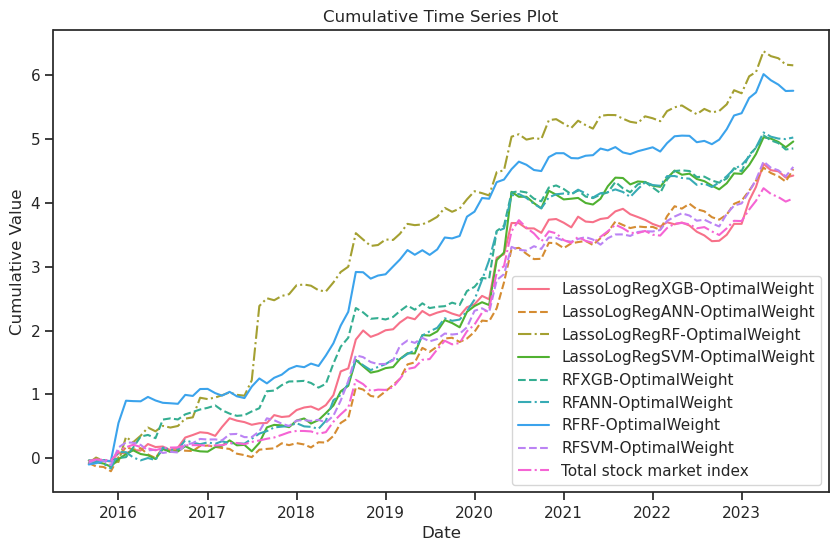

In [66]:
sns.set_theme(style="ticks")
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot each column using Seaborn's lineplot with different line styles and colors
palette = sns.color_palette("husl", n_colors=len(cumulative_df.columns))
line_styles = ['-', '--', '-.']

for i, column in enumerate(cumulative_df.columns):
    sns.lineplot(data=cumulative_df[column], label=column, linestyle=line_styles[i % len(line_styles)], color=palette[i])

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Time Series Plot')

# Show legend
plt.legend()

# Save the plot to a file (optional)
plt.savefig("cumulative_time_series_plot.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [67]:
cumulative_df.to_excel('./cumulative_df_OW.xlsx', index=True)

In [68]:
sorted_performace = cumulative_df.iloc[-1].sort_values(ascending=False)
performace = pd.DataFrame(sorted_performace)

In [69]:
performace

,2023-08-01
LassoLogRegRF-OptimalWeight,6.157548
RFRF-OptimalWeight,5.758954
RFANN-OptimalWeight,5.025982
LassoLogRegSVM-OptimalWeight,4.963228
RFXGB-OptimalWeight,4.854997
RFSVM-OptimalWeight,4.564972
LassoLogRegANN-OptimalWeight,4.531818
LassoLogRegXGB-OptimalWeight,4.429625
Total stock market index,4.070211


In [70]:
performace.reset_index(inplace=True)
performace.rename(columns={'index': 'Method', '2023-08-01 00:00:00': 'Performance'}, inplace=True)
column_names = performace.columns
second_column_name = column_names[1]
performace = performace.rename(columns={second_column_name: 'Performance'})

In [71]:
performace

,Method,Performance
0,LassoLogRegRF-OptimalWeight,6.157548
1,RFRF-OptimalWeight,5.758954
2,RFANN-OptimalWeight,5.025982
3,LassoLogRegSVM-OptimalWeight,4.963228
4,RFXGB-OptimalWeight,4.854997
5,RFSVM-OptimalWeight,4.564972
6,LassoLogRegANN-OptimalWeight,4.531818
7,LassoLogRegXGB-OptimalWeight,4.429625
8,Total stock market index,4.070211


In [72]:
performace.to_excel('./performace_OW.xlsx', index=False)

In [73]:
(6.15 - 4.07) / 4.07

0.5110565110565111